In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd

import warnings


from helpers import *

DATA_DIR = Path().cwd()/"data"
OUTPUT_DIR = Path().cwd()/"plots"/"benchmark_heatmaps"

In [8]:
analytics = pd.read_csv("analytics_data.csv")
success_rates = analytics.groupby(["method", "map"])["finished"].max().sort_values(ascending=False).unstack()
display(success_rates)

map,NonConvex,Piped,StandardStones,ThickStones
method,,,,
Blend,True,True,True,True
BlendManual20,True,True,True,True
BlendManual30,True,True,True,True
BlendManualFiveControl,True,True,True,True
BlendManualOneControl,True,True,True,True
BlendManualTwoControl,True,True,True,True
BlendUnlearn,True,True,True,True
Cable,True,True,True,True
Cable20,True,True,True,True


In [9]:
MAPS_DIR = Path().cwd().parent/"for_thesis"/"maps"
map_name = "ThickStones"
method = "RadiusRL"

im  = mpimg.imread(MAPS_DIR/(map_name+'.png'))
t_dir =DATA_DIR/map_name/method/"path"
hm = calcHeatmap(t_dir)
hm = smoothHeatmap(hm)
reached = analytics[(analytics["map"]==map_name) & (analytics["method"]==method)]["finished"].values[0]
overlayHeatmap("test.png",hm,im,reached=reached)


Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Total values: 10368590
(800, 1900) (800, 1900, 3)


In [6]:
for bmap in MAPS_DIR.iterdir():
    bmap_name = bmap.stem
    map_dir = DATA_DIR/bmap_name

    map_img = mpimg.imread(bmap)
    if not map_dir.is_dir():
        warnings.warn(f"Map directory {map_dir} does not exist")
        continue
    output_dir_cur = OUTPUT_DIR/bmap_name
    os.makedirs(output_dir_cur, exist_ok=True)
    for method in map_dir.iterdir():
        print(f"Creating {output_dir_cur/(method.stem+'.png')}")
        hm = smoothHeatmap(calcHeatmap(method/"path"))
        reached = analytics[(analytics["map"]==bmap_name) & (analytics["method"]==method.stem)]["finished"].values[0]
        overlayHeatmap(output_dir_cur/(method.stem+".png"), hm, map_img, reached=reached)
        print(f"Saved {output_dir_cur/(method.stem+'.png')}")





Creating /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/scripts/analytics/plots/benchmark_heatmaps/NonConvex/Blend.png
Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Total values: 2055130
(800, 1900) (800, 1900, 3)
Saved /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/scripts/analytics/plots/benchmark_heatmaps/NonConvex/Blend.png
Creating /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/scripts/analytics/plots/benchmark_heatmaps/NonConvex/BlendManual30.png
Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
P

(800, 1900) (800, 1900, 3)


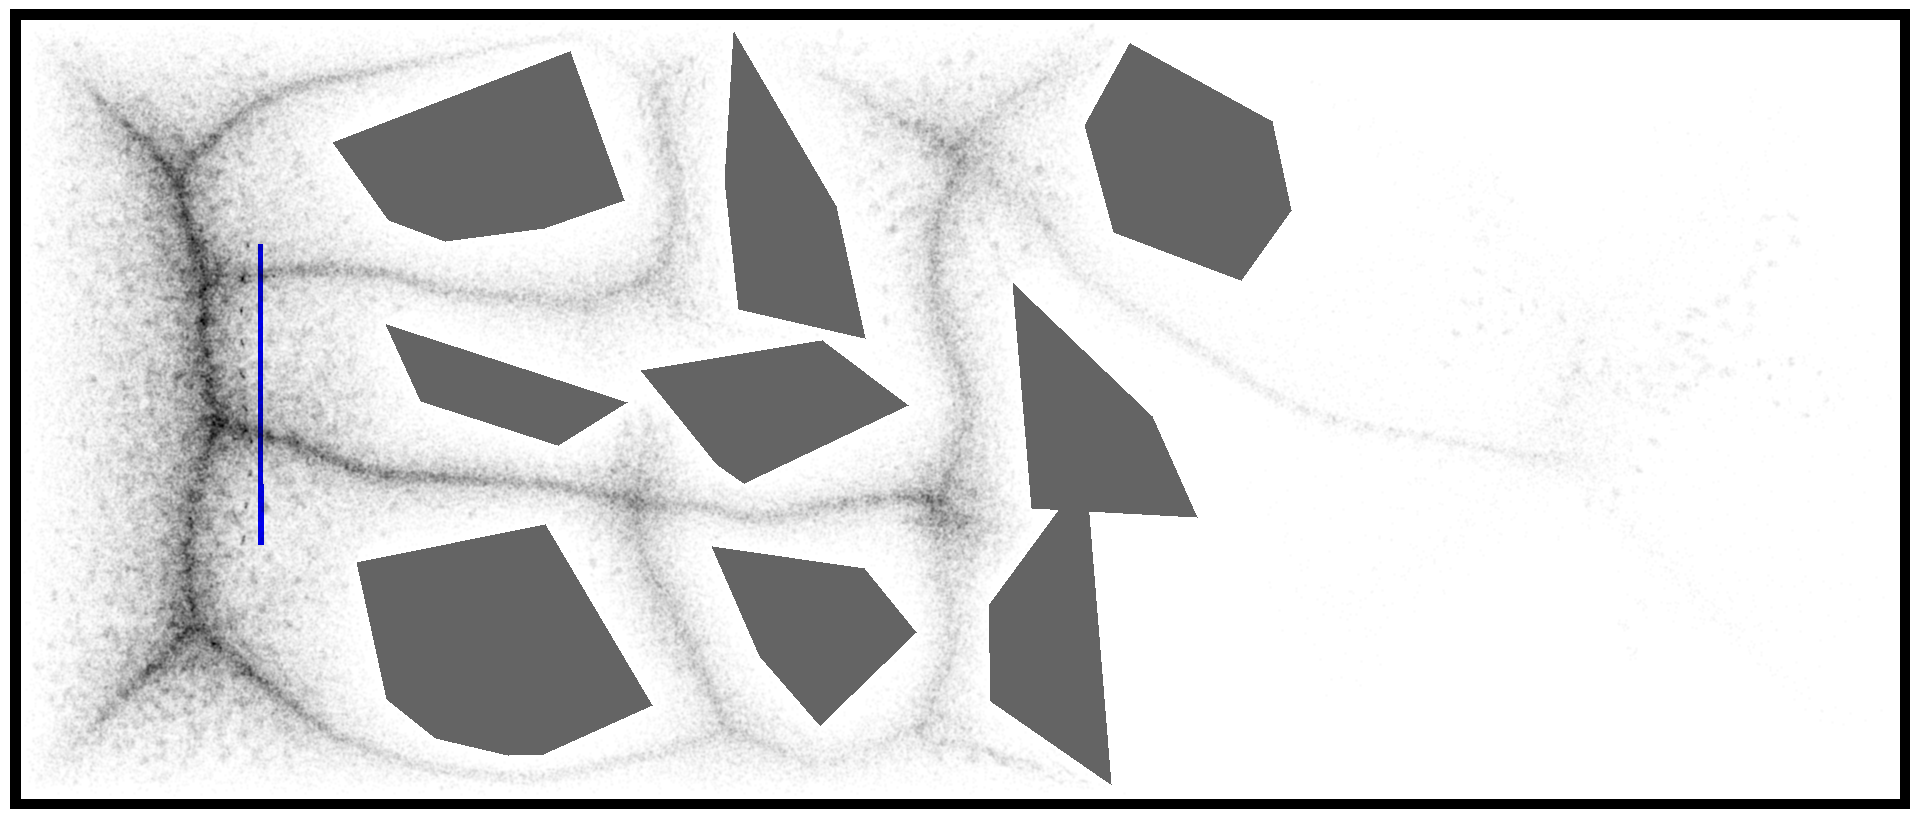

In [21]:
smoothed = smoothHeatmap(hm, sigma=1)
overlayHeatmap("heatmap.png",smoothed,im,show=True)
